In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#data science - standard library
import pandas as pd
import numpy as np

#regression
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [4]:
filepath = "baig_cities.csv"
df = pd.read_csv(filepath)
df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Bengkulu,-3.80,102.27,75.42,80.76,84,1011,4.27,63
1,Eyl,7.98,49.82,76.32,75.34,66,1013,10.42,63
2,Ponta do Sol,32.67,-17.10,59.02,53.26,59,1014,8.05,63
3,Zavetnoye,47.12,43.89,46.42,34.70,69,1014,15.82,63
4,Port Elizabeth,-33.92,25.57,57.20,54.97,87,1011,5.82,63


In [5]:
df.shape

(545, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         545 non-null    object 
 1   Latitude     545 non-null    float64
 2   Longitude    545 non-null    float64
 3   Temperature  545 non-null    float64
 4   Feels Like   545 non-null    float64
 5   Humidity     545 non-null    int64  
 6   Pressure     545 non-null    int64  
 7   Wind Speed   545 non-null    float64
 8   Cloudiness   545 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 38.4+ KB


In [7]:
df.describe()

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.0
mean,19.491321,16.879927,58.633945,55.332606,72.225688,1012.946789,8.289156,63.0
std,33.408915,92.049823,22.358855,27.473492,19.869854,8.344981,6.074582,0.0
min,-54.800000,-175.200000,-15.050000,-22.650000,10.000000,946.000000,0.400000,63.0
25%,-8.140000,-63.060000,46.400000,37.940000,63.000000,1009.000000,3.830000,63.0
50%,22.290000,18.960000,63.860000,59.700000,77.000000,1013.000000,6.930000,63.0
75%,47.470000,100.480000,77.000000,78.960000,87.000000,1017.000000,11.410000,63.0
max,78.220000,179.320000,94.600000,96.890000,100.000000,1034.000000,44.960000,63.0


# Additional Visuals

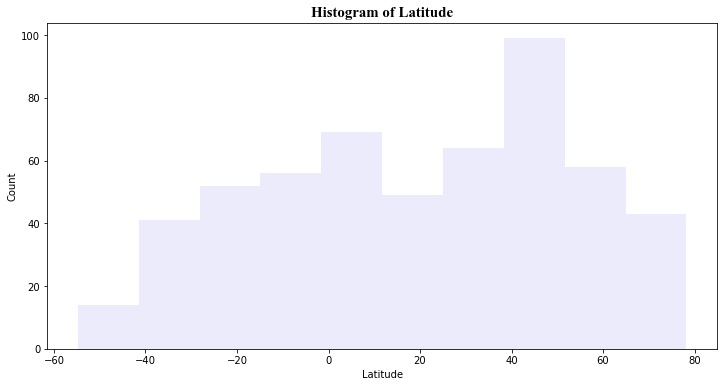

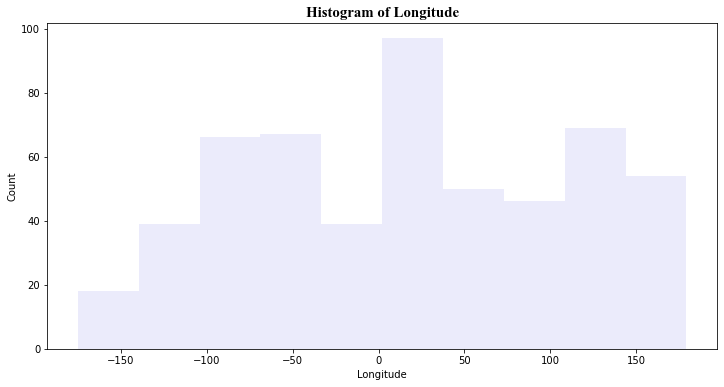

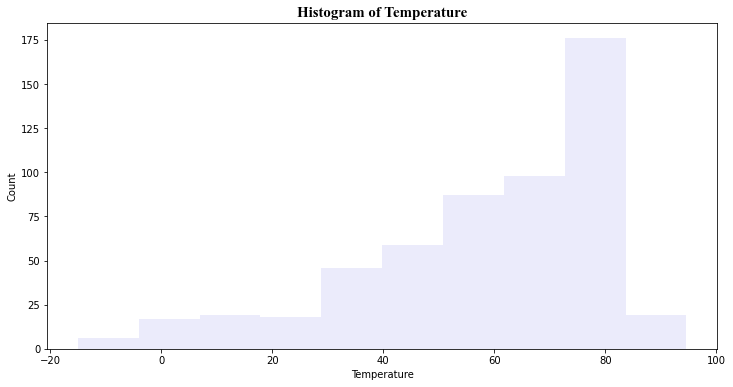

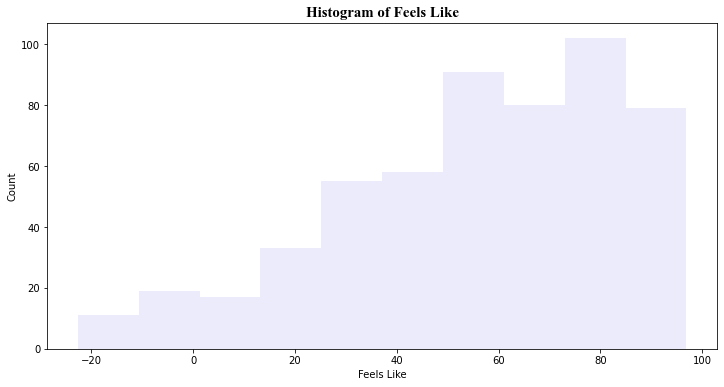

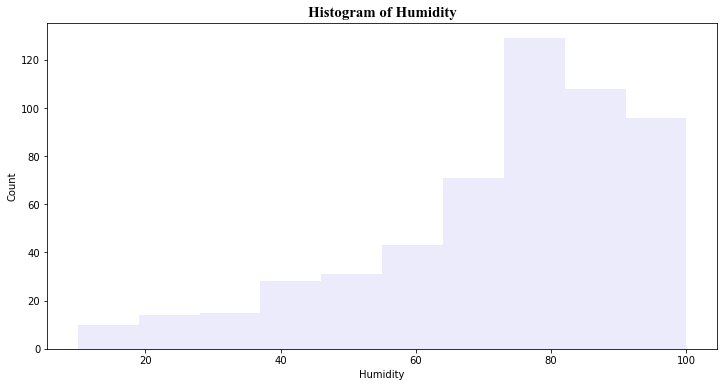

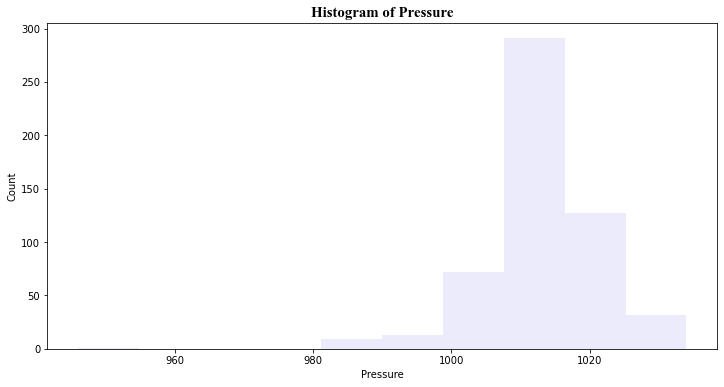

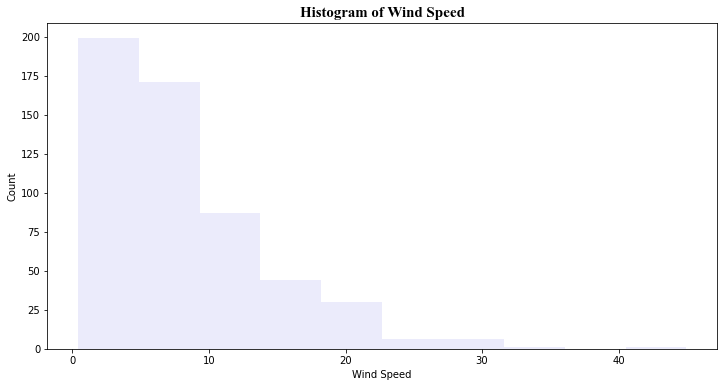

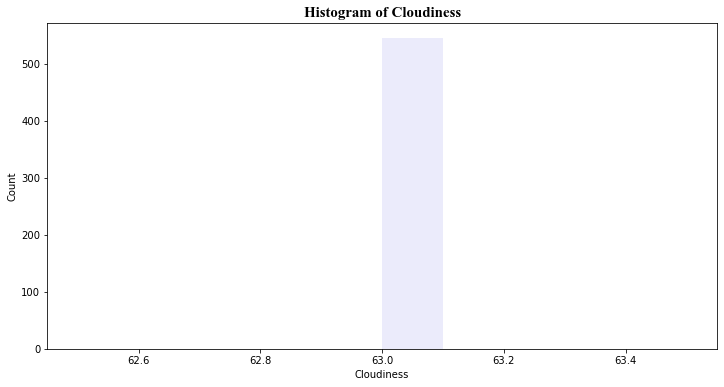

In [14]:
 for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        plt.figure(figsize=(12,6))

        plt.hist(df[col], color = "lavender", alpha=0.8)
        plt.title(f"Histogram of {col}", fontsize=15, fontweight="bold", fontname = "Times New Roman")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

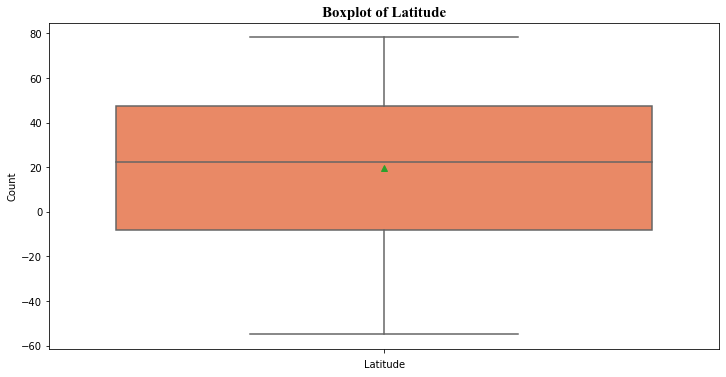

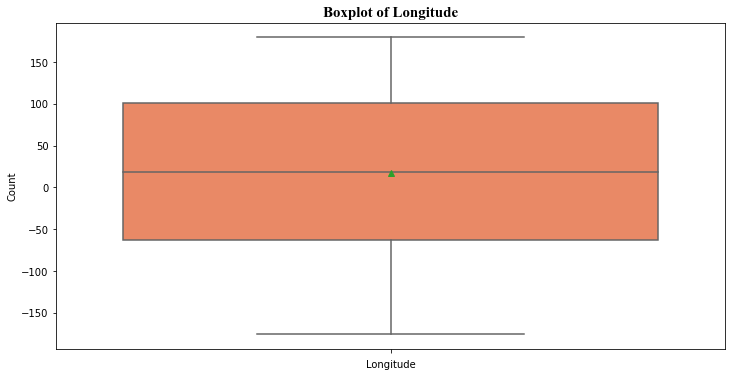

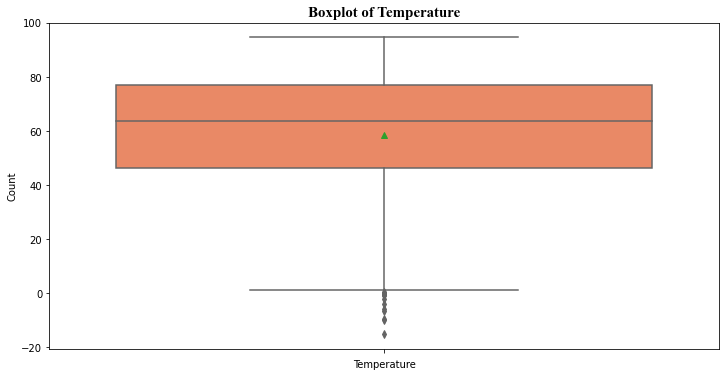

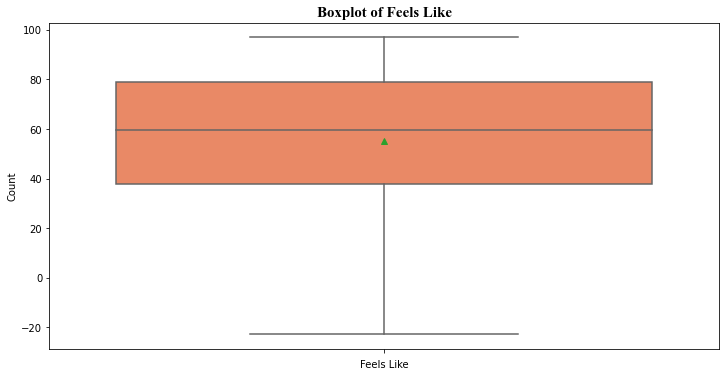

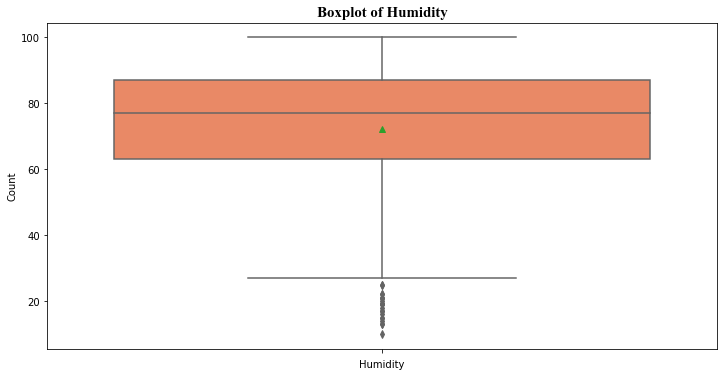

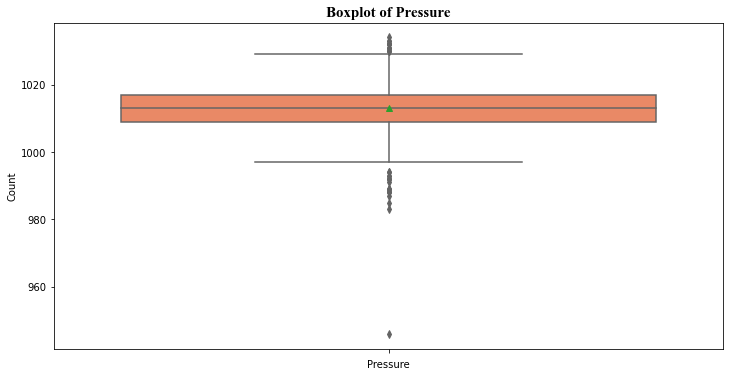

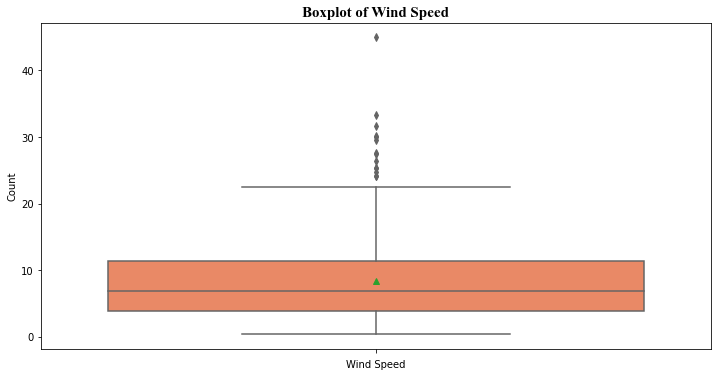

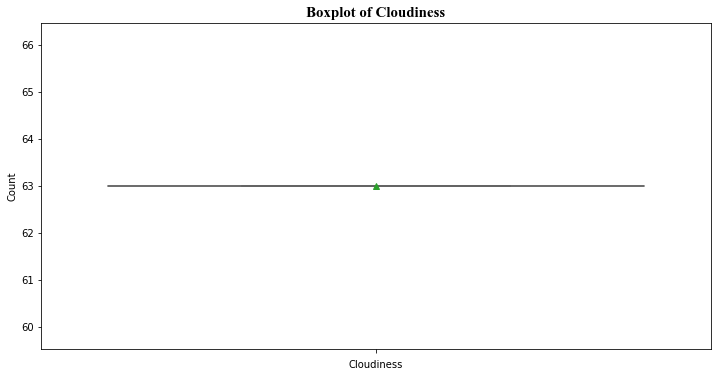

In [18]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        
        plt.figure(figsize=(12,6))

        sns.boxplot(y=col, data=df, color = "coral", showmeans="True")
        plt.title(f"Boxplot of {col}", fontsize=15, fontweight="bold", fontname = "Times New Roman")
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.show()

# Scatter Plots

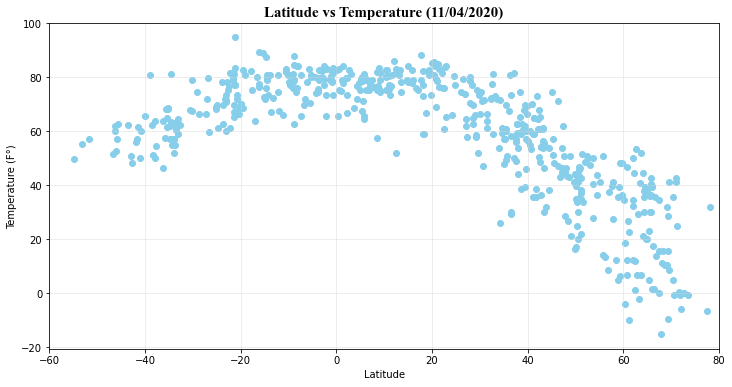

In [22]:
plt.figure(figsize=(12,6))

plt.scatter(df.Latitude, df.Temperature, color = "#87ceeb")
plt.title("Latitude vs Temperature (11/04/2020)", fontsize=15, fontweight="bold", fontname = "Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

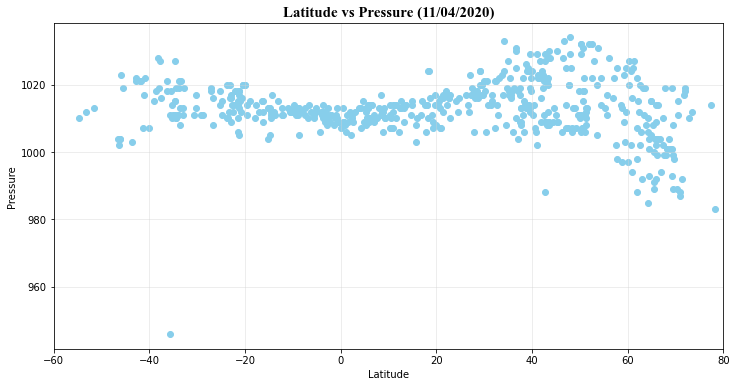

In [25]:
plt.figure(figsize=(12,6))

plt.scatter(df.Latitude, df.Pressure, color = "#87ceeb")
plt.title("Latitude vs Pressure (11/04/2020)", fontsize=15, fontweight="bold", fontname = "Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Pressure")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

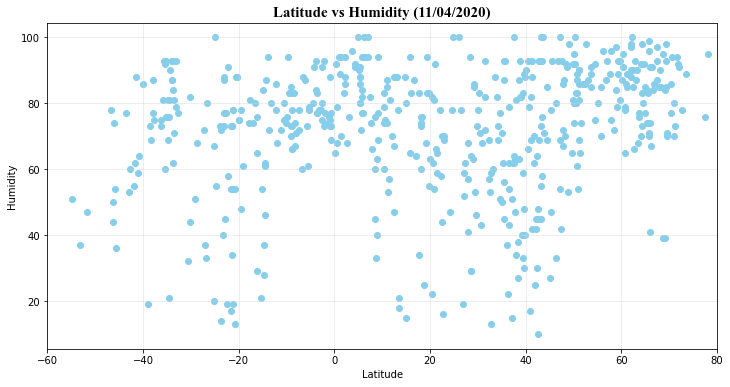

In [26]:
plt.figure(figsize=(12,6))

plt.scatter(df.Latitude, df.Humidity, color = "#87ceeb")
plt.title("Latitude vs Humidity (11/04/2020)", fontsize=15, fontweight="bold", fontname = "Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

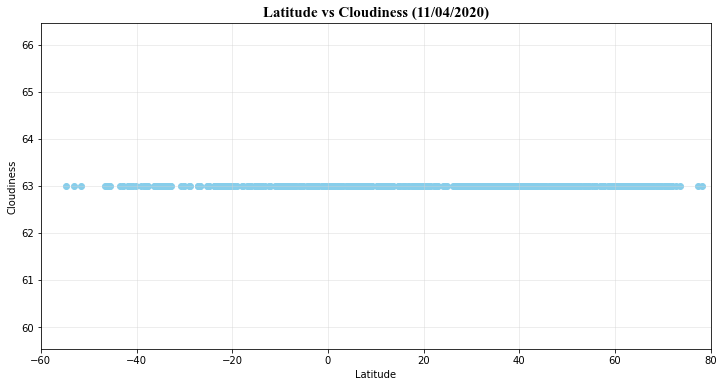

In [27]:
plt.figure(figsize=(12,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "#87ceeb")
plt.title("Latitude vs Cloudiness (11/04/2020)", fontsize=15, fontweight="bold", fontname = "Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

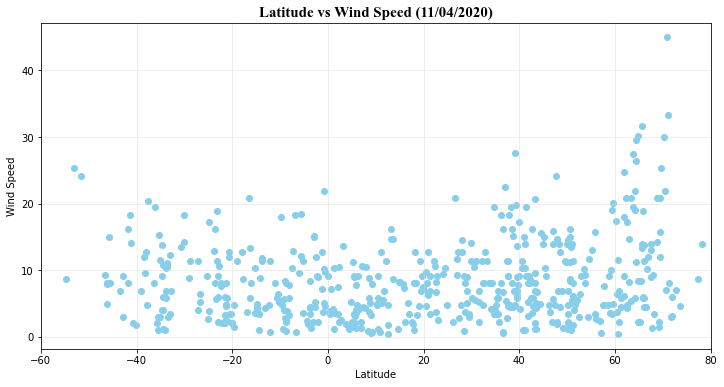

In [28]:
plt.figure(figsize=(12,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "#87ceeb")
plt.title("Latitude vs Wind Speed (11/04/2020)", fontsize=15, fontweight="bold", fontname = "Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

# Regression

In [29]:
corrs = df.corr()
corrs

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
Latitude,1.000000,-0.154177,-0.652155,-0.654985,0.177421,-0.073201,0.171343,NaN
Longitude,-0.154177,1.000000,-0.077047,-0.023600,0.212631,0.046242,-0.231442,NaN
Temperature,-0.652155,-0.077047,1.000000,0.982920,-0.291385,0.029399,-0.113094,NaN
Feels Like,-0.654985,-0.023600,0.982920,1.000000,-0.176817,0.048401,-0.250263,NaN
Humidity,0.177421,0.212631,-0.291385,-0.176817,1.000000,-0.053363,-0.067349,NaN
Pressure,-0.073201,0.046242,0.029399,0.048401,-0.053363,1.000000,-0.242033,NaN
Wind Speed,0.171343,-0.231442,-0.113094,-0.250263,-0.067349,-0.242033,1.000000,NaN
Cloudiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
target = df.Temperature
feature = df.Latitude

In [33]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     401.9
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.55e-67
Time:                        14:26:14   Log-Likelihood:                -2315.3
No. Observations:                 545   AIC:                             4635.
Df Residuals:                     543   BIC:                             4643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.1410      0.842     79.782      0.000      65.488      68.794
Latitude      -0.4365      0.022    -20.046      0.000      -0.479      -0.394
==============================================================================
Omnibus:                       39.285   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.155
Skew:                          -0.704   Prob(JB):                     9.50e-11
Kurtosis:                       2.773   Cond. No.                         44.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_WE"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness,Hemisphere_NS,Hemisphere_WE
0,Bengkulu,-3.80,102.27,75.42,80.76,84,1011,4.27,63,Southern,Eastern
1,Eyl,7.98,49.82,76.32,75.34,66,1013,10.42,63,Northern,Eastern
2,Ponta do Sol,32.67,-17.10,59.02,53.26,59,1014,8.05,63,Northern,Western
3,Zavetnoye,47.12,43.89,46.42,34.70,69,1014,15.82,63,Northern,Eastern
4,Port Elizabeth,-33.92,25.57,57.20,54.97,87,1011,5.82,63,Southern,Eastern


In [42]:
def doRegressionWork(hemisphere, df, inp_target):
    #filter
    if hemisphere in ["Northern", "Southern"]:
        df_sub = df.loc[df.Hemisphere_NS == hemisphere]
    else:
        df_sub = df.loc[df.Hemisphere_WE == hemisphere]
        
    # get target
    target = df_sub[inp_target]
    feature = df_sub.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    # get equation
    slope = results.params[1]
    intercept = results.params[0]

    regress_values = feature * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    # plot
    plt.figure(figsize=(10,6))

    plt.scatter(df_sub.Latitude, df_sub[inp_target], color = "#ffb347")
    plt.title(f"Latitude vs {inp_target}(11/04/2020)", fontsize=15, fontweight="bold", fontname = "Times New Roman")
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    plt.grid(color="lightgrey", alpha = 0.5)
    
    plt.plot(feature, regress_values, color="skyblue")

    plt.show()

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     208.9
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.43e-31
Time:                        14:40:25   Log-Likelihood:                -569.65
No. Observations:                 171   AIC:                             1143.
Df Residuals:                     169   BIC:                             1150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.6675      0.967     85.529      0.0

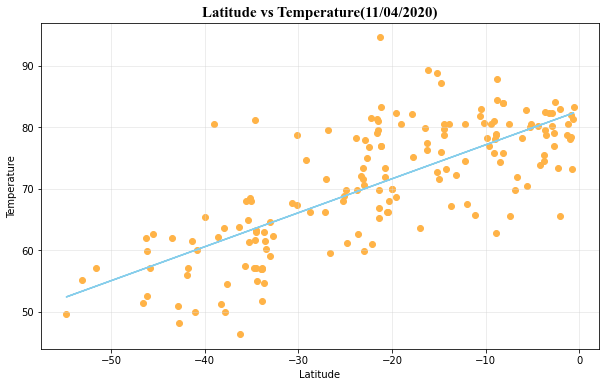

In [41]:
 doRegressionWork("Southern", df, "Temperature")

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     937.9
Date:                Sun, 08 Nov 2020   Prob (F-statistic):          1.00e-103
Time:                        14:45:29   Log-Likelihood:                -1485.2
No. Observations:                 374   AIC:                             2974.
Df Residuals:                     372   BIC:                             2982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.5791      1.395     64.925      0.0

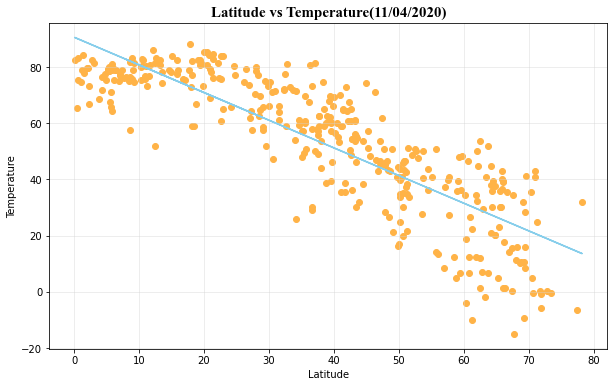

In [44]:
doRegressionWork("Northern", df, "Temperature")

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.345
Date:                Sun, 08 Nov 2020   Prob (F-statistic):            0.00240
Time:                        15:00:25   Log-Likelihood:                -1647.3
No. Observations:                 374   AIC:                             3299.
Df Residuals:                     372   BIC:                             3307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.8026      2.152     31.502      0.0

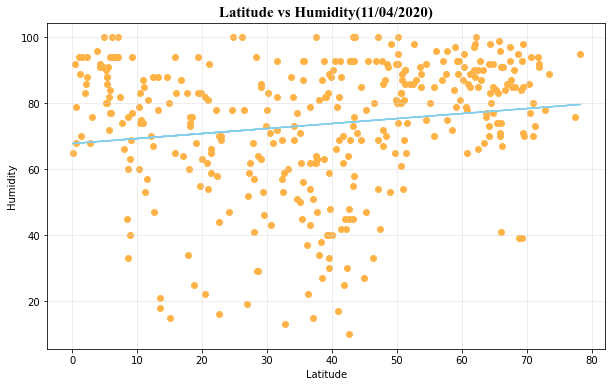

In [46]:
doRegressionWork("Northern", df, "Humidity")

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     8.112
Date:                Sun, 08 Nov 2020   Prob (F-statistic):            0.00494
Time:                        15:00:32   Log-Likelihood:                -742.84
No. Observations:                 171   AIC:                             1490.
Df Residuals:                     169   BIC:                             1496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.6373      2.661     28.422      0.0

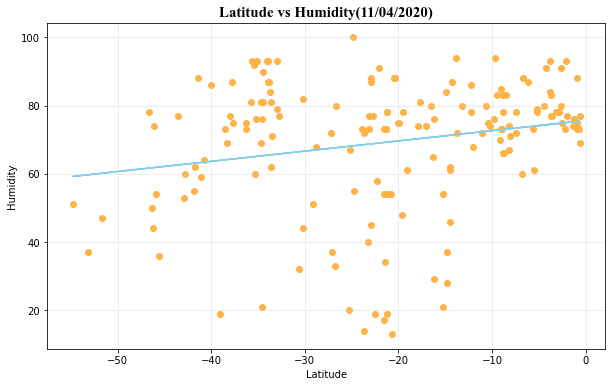

In [47]:
doRegressionWork("Southern", df, "Humidity")

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -372.0
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               1.00
Time:                        15:00:56   Log-Likelihood:                 11243.
No. Observations:                 374   AIC:                        -2.248e+04
Df Residuals:                     372   BIC:                        -2.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.0000   2.32e-15   2.72e+16      0.0

/Users/juveriyabaig/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


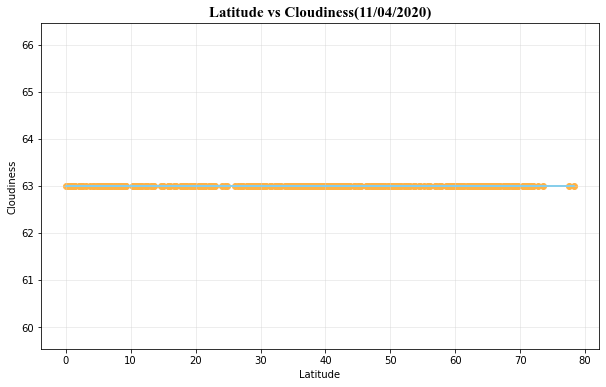

In [48]:
doRegressionWork("Northern", df, "Cloudiness")

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -169.0
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               1.00
Time:                        15:01:12   Log-Likelihood:                 5299.6
No. Observations:                 171   AIC:                        -1.060e+04
Df Residuals:                     169   BIC:                        -1.059e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.0000    1.2e-15   5.25e+16      0.0

/Users/juveriyabaig/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


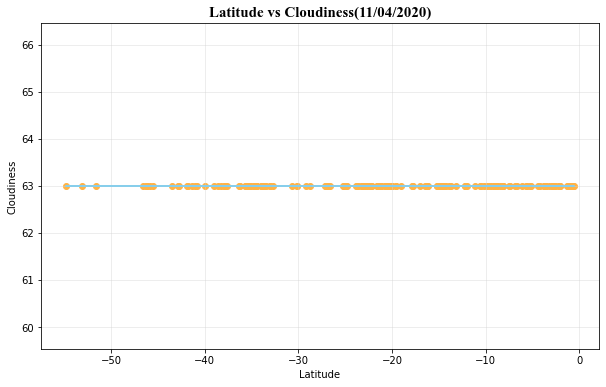

In [49]:
doRegressionWork("Southern", df, "Cloudiness")

In [ ]:
As mentioned above, the Southern Hemisphere has less clouds appearing at different lattitudes. 

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     47.10
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.83e-11
Time:                        15:01:36   Log-Likelihood:                -1202.9
No. Observations:                 374   AIC:                             2410.
Df Residuals:                     372   BIC:                             2418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5429      0.656      6.927      0.0

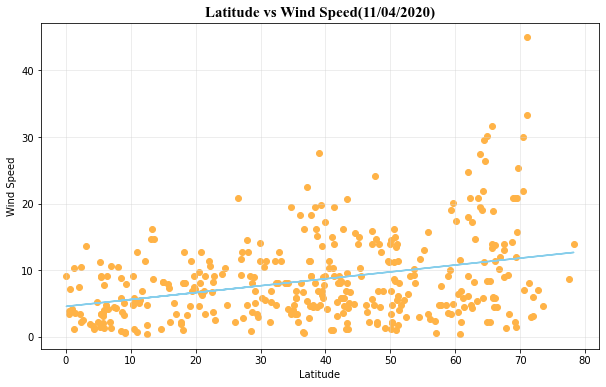

In [50]:
doRegressionWork("Northern", df, "Wind Speed")

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     6.584
Date:                Sun, 08 Nov 2020   Prob (F-statistic):             0.0112
Time:                        15:01:49   Log-Likelihood:                -522.42
No. Observations:                 171   AIC:                             1049.
Df Residuals:                     169   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2461      0.733      8.518      0.0

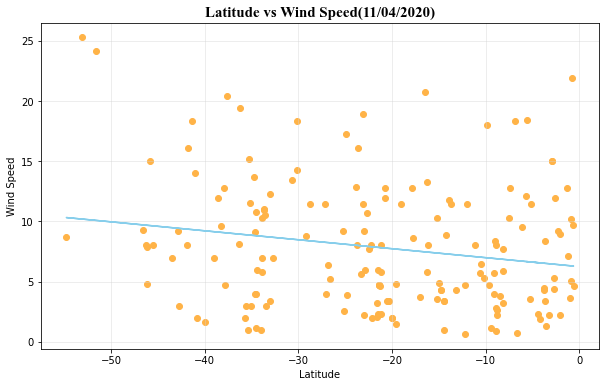

In [51]:
doRegressionWork("Southern", df, "Wind Speed")

# 3 observable trends